In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [5]:
!pip install nltk

In [6]:
!pip install stopwords

In [10]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.0 kB 388.9 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.0 kB 465.5 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.0 kB 595.3 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.0 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 901.3 kB/s eta 0:00:00


In [19]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 229.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.6 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.6 MB 2.6 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.6 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.6 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_excel('sms_data.xlsx')

In [4]:
df.head()

TemplateID SenderName     AccountType            MsgType        Target  \
0  GPPJSB_01     GPPJSB  BANK_STATEMENT  RECHARGE_REMINDER      Reminder   
1  GPPSBL_01     GPPSBL  BANK_STATEMENT              DEBIT  Non Reminder   
2  GPPSBL_02     GPPSBL  BANK_STATEMENT              DEBIT  Non Reminder   
3  GPPSBL_03     GPPSBL  BANK_STATEMENT              DEBIT  Non Reminder   
4  GPPSBL_04     GPPSBL  BANK_STATEMENT              DEBIT  Non Reminder   

  TransactionPurpose                                       TemplateText  \
0      FUND_TRANSFER  .*[Xx*0-9]*([0-9]{4}).*[RsINR]{2,3}\s*[.*:,\s]...   
1      FUND_TRANSFER  .*Alert\s*[RsINR]{2,3}\s*[.*:,\s]*([0-9,]*\.?\...   
2      FUND_TRANSFER  .*Alert\s*[RsINR]{2,3}\s*[.*:,\s]*([0-9,]*\.?\...   
3      FUND_TRANSFER  .*No.\s*[Xx*0-9]*([0-9]{3}).*[RsINR]{2,3}\s*[....   
4      FUND_TRANSFER  .*No.\s*[Xx*0-9]*([0-9]{3}).*[RsINR]{2,3}\s*[....   

    FieldOrder                                          SampleSMS  
0    3,2,5,6,7  Your a/c no. XXXXXXXX0131 is debited for Rs.10...  
1    2,5,6,7,2  Dear Customer, ATM Alert Rs.10 Debited  to you...  
2    2,5,6,7,3  Dear Customer, ATM Alert Rs.10 Debited  to you...  
3  2,3,5,6,7,2  Your Ac No. 018/XXXXX112 has been debited by R...  
4  2,3,5,6,7,3  Your Ac No. 018/XXXXX112 has been debited by R...

In [5]:
#get necessary columns for processing
df = df[['SampleSMS', 'Target']]
df = df.rename(columns={'SampleSMS': 'messages', 'Target': 'label'})
# df

In [6]:
df

messages         label
0      Your a/c no. XXXXXXXX0131 is debited for Rs.10...      Reminder
1      Dear Customer, ATM Alert Rs.10 Debited  to you...  Non Reminder
2      Dear Customer, ATM Alert Rs.10 Debited  to you...  Non Reminder
3      Your Ac No. 018/XXXXX112 has been debited by R...  Non Reminder
4      Your Ac No. 018/XXXXX112 has been debited by R...  Non Reminder
...                                                  ...           ...
13410  Congrats! Ur loan of Rs.11,604 is disbursed. A...  Non Reminder
13411  Dear Customer, EMI of Rs. 10027.00 will get au...      Reminder
13412  Dear Subscriber, Thank you for joining Tata Pl...  Non Reminder
13413  Hi PEDDAMMALA KETHAN, your FlexPay account 875...      Reminder
13414  ALERT! You missed your FlexSalary payment on 1...      Reminder

[13415 rows x 2 columns]

In [7]:
df = df.dropna(subset=['label'])

In [8]:
df = df[df['label'].isin(['Reminder', 'Non Reminder'])]

In [9]:
df

messages         label
0      Your a/c no. XXXXXXXX0131 is debited for Rs.10...      Reminder
1      Dear Customer, ATM Alert Rs.10 Debited  to you...  Non Reminder
2      Dear Customer, ATM Alert Rs.10 Debited  to you...  Non Reminder
3      Your Ac No. 018/XXXXX112 has been debited by R...  Non Reminder
4      Your Ac No. 018/XXXXX112 has been debited by R...  Non Reminder
...                                                  ...           ...
13410  Congrats! Ur loan of Rs.11,604 is disbursed. A...  Non Reminder
13411  Dear Customer, EMI of Rs. 10027.00 will get au...      Reminder
13412  Dear Subscriber, Thank you for joining Tata Pl...  Non Reminder
13413  Hi PEDDAMMALA KETHAN, your FlexPay account 875...      Reminder
13414  ALERT! You missed your FlexSalary payment on 1...      Reminder

[13275 rows x 2 columns]

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['label'] = encoder.fit_transform(df['label'])
df.head()

messages  label
0  Your a/c no. XXXXXXXX0131 is debited for Rs.10...      1
1  Dear Customer, ATM Alert Rs.10 Debited  to you...      0
2  Dear Customer, ATM Alert Rs.10 Debited  to you...      0
3  Your Ac No. 018/XXXXX112 has been debited by R...      0
4  Your Ac No. 018/XXXXX112 has been debited by R...      0

In [12]:
df['label'].value_counts()

label
0    8433
1    4842
Name: count, dtype: int64

In [13]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
  # convert to lowercase
  text = text.lower()
  # remove special characters
  text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
  # remove extra space
  text = re.sub(r'\s+', ' ', text)
  # remove stopwords
  text = " ".join(word for word in text.split() if word not in STOPWORDS)
  return text

In [14]:
# clean the messages
df['clean_text']= df['messages'].apply(clean_text)
df

messages  label  \
0      Your a/c no. XXXXXXXX0131 is debited for Rs.10...      1   
1      Dear Customer, ATM Alert Rs.10 Debited  to you...      0   
2      Dear Customer, ATM Alert Rs.10 Debited  to you...      0   
3      Your Ac No. 018/XXXXX112 has been debited by R...      0   
4      Your Ac No. 018/XXXXX112 has been debited by R...      0   
...                                                  ...    ...   
13410  Congrats! Ur loan of Rs.11,604 is disbursed. A...      0   
13411  Dear Customer, EMI of Rs. 10027.00 will get au...      1   
13412  Dear Subscriber, Thank you for joining Tata Pl...      0   
13413  Hi PEDDAMMALA KETHAN, your FlexPay account 875...      1   
13414  ALERT! You missed your FlexSalary payment on 1...      1   

                                              clean_text  
0      c xxxxxxxx0131 debited rs 10000 00 19 03 20 c ...  
1      dear customer atm alert rs 10 debited account ...  
2      dear customer atm alert rs 10 debited account ...  
3      ac 018 xxxxx112 debited rs 100 06 apr 2021 tra...  
4      ac 018 xxxxx112 debited rs 100 06 apr 2021 tra...  
...                                                  ...  
13410  congrats ur loan rs 11 604 disbursed allow 72 ...  
13411  dear customer emi rs 10027 00 get auto debited...  
13412  dear subscriber thank joining tata plays flexi...  
13413  hi peddammala kethan flexpay account 875874 to...  
13414  alert missed flexsalary payment 1 31 2023 rs 4...  

[13275 rows x 3 columns]

In [15]:
# converting text into numeric... apllying tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import GridSearchCV


In [16]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [17]:
X = tfidf.fit_transform(df['clean_text']).toarray()

In [18]:
X

array([[0.18300358, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
y = df['label'].values

In [20]:
y

array([1, 0, 0, ..., 0, 1, 1])

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)


In [22]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [23]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [24]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='micro'))

0.6844087371328145
[[1400 1108]
 [ 149 1326]]
0.6844087371328145


In [25]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='micro'))

0.853878985689179
[[2196  312]
 [ 270 1205]]
0.853878985689179


In [26]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='micro'))

0.8611599297012302
[[2189  319]
 [ 234 1241]]
0.8611599297012302


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
svc = SVC(kernel='rbf', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)

In [29]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
}

In [31]:
def train_classifier(clf,X_train,y_train, X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred,average='micro')

  return accuracy,precision

In [62]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.913130805925182, 0.913130805925182)

In [32]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.913130805925182
Precision -  0.913130805925182
For  KN
Accuracy -  0.8626663319106201
Precision -  0.8626663319106201
For  NB
Accuracy -  0.853878985689179
Precision -  0.853878985689179
For  DT
Accuracy -  0.8606577956314336
Precision -  0.8606577956314336
For  LR
Accuracy -  0.8870198342957569
Precision -  0.8870198342957569
For  RF
Accuracy -  0.9096158674366056
Precision -  0.9096158674366056


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.8732111473763495
Precision -  0.8732111473763495
For  BgC
Accuracy -  0.908360532262114
Precision -  0.908360532262114
For  ETC
Accuracy -  0.9181521466231484
Precision -  0.9181521466231484
For  GBDT
Accuracy -  0.8727090133065528
Precision -  0.8727090133065528


In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [34]:
performance_df

Algorithm  Accuracy  Precision
8       ETC  0.918152   0.918152
0       SVC  0.913131   0.913131
5        RF  0.909616   0.909616
7       BgC  0.908361   0.908361
4        LR  0.887020   0.887020
6  AdaBoost  0.873211   0.873211
9      GBDT  0.872709   0.872709
1        KN  0.862666   0.862666
3        DT  0.860658   0.860658
2        NB  0.853879   0.853879

In [37]:
!pip install seaborn

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------- -------------------------------- 30.7/162.8 kB ? eta -:--:--
     ------- -------------------------------- 30.7/162.8 kB ? eta -:--:--
     ------- -------------------------------- 30.7/162.8 kB ? eta -:--:--
     ------------------------ ----------- 112.6/162.8 kB 726.2 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.8 kB 726.2 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.8 kB 726.2 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.8 kB 726.2 kB/s eta 0:00:01
     --------------------------------- -- 153.6/162.8 kB 416.7 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 375.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB ? eta -:--:--
   --------

In [41]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [43]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

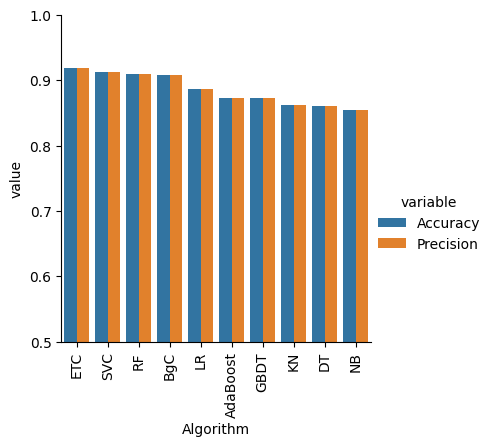

In [45]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [47]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [48]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [49]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [50]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [51]:
new_df_scaled.merge(temp_df,on='Algorithm')


Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0       ETC  0.918152   0.918152            0.918152             0.918152   
1       SVC  0.913131   0.913131            0.913131             0.913131   
2        RF  0.909616   0.909616            0.909616             0.909616   
3       BgC  0.908361   0.908361            0.908361             0.908361   
4        LR  0.887020   0.887020            0.887020             0.887020   
5  AdaBoost  0.873211   0.873211            0.873211             0.873211   
6      GBDT  0.872709   0.872709            0.872709             0.872709   
7        KN  0.862666   0.862666            0.862666             0.862666   
8        DT  0.860658   0.860658            0.860658             0.860658   
9        NB  0.853879   0.853879            0.853879             0.853879   

   Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0            0.918152             0.918152            0.918152   
1            0.913131             0.913131            0.913131   
2            0.909616             0.909616            0.909616   
3            0.908361             0.908361            0.908361   
4            0.887020             0.887020            0.887020   
5            0.873211             0.873211            0.873211   
6            0.872709             0.872709            0.872709   
7            0.862666             0.862666            0.862666   
8            0.860658             0.860658            0.860658   
9            0.853879             0.853879            0.853879   

   Precision_num_chars  
0             0.918152  
1             0.913131  
2             0.909616  
3             0.908361  
4             0.887020  
5             0.873211  
6             0.872709  
7             0.862666  
8             0.860658  
9             0.853879

In [70]:
import pickle
pickle.dump(tfidf,open('vectorizer3.pkl','wb'))
pickle.dump(etc,open('model3.pkl','wb'))